In [2]:
%%HTML
<link rel="stylesheet" type="text/css" href="styles.css">

<h1>Andamento dei prezzi dei laptop</h1>

<h3>Obiettivo:</h3>
<ul>
    <dd>Capire se c'è una relazione tra il prezzo e altre caratteristiche di un laptop.</dd>
</ul>

<h3>Domande:</h3>
<ol>
    <li>Quale fascia di laptop è prodotta in maggiore quantità ? Cambia a seconda della famiglia del processore ?</li>
    <li>Qual è il peso medio dei laptop in base alla marca? C'è una relazione tra il prezzo e il peso del laptop ?</li>
    <li>Il prezzo varia regolarmente in base alla risoluzione schermo?</li>
    <li>Negli anni il divario di prezzo tra gli schermi 4K e FHD è diminuito?</li>
</ol>

<h2>Dati utilizzati</h2>

<ul>
    <dt>Dataset:</dt>
    <dd><a href = "https://www.kaggle.com/datasets/asinow/laptop-price-dataset">Laptop Price Dataset</a></dd>
    <dt>Dati utilizzati:</dt>
    <dd>Brand, Processore, GPU e altre caratteristiche tecniche.</dd>
    <dt>Crediti del dataset:</dt>
    <dd><a href="https://www.kaggle.com/asinow">Asinow</a></dd>
</ul>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
sns.set(style="darkgrid")

In [4]:
def apply_labelpad(ax, xlabel=None, ylabel=None, xpad=15, ypad=15, xloc="center", yloc="center"):
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=14, labelpad=xpad, loc=xloc)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=14, labelpad=ypad, loc=yloc)

def apply_title(ax, title, padding = 15, align = 'center'):
    ax.set_title(label = title, fontsize = 16, pad = padding, loc = align);


In [5]:
processor_palette = {'Intel': '#0068b5', 'AMD': '#f26522'}
resolution_palette = sns.color_palette("rocket", 4)
resolution_name = {"3840x2160": "4K", "2560x1440": "2K", "1920x1080": "Full HD", "1366x768": "HD"}


In [6]:
df_laptop = pd.read_csv('Dataset/laptop.csv', encoding='utf8')

<h1> Quale fascia di laptop è prodotta in maggiore quantità ? </h1>

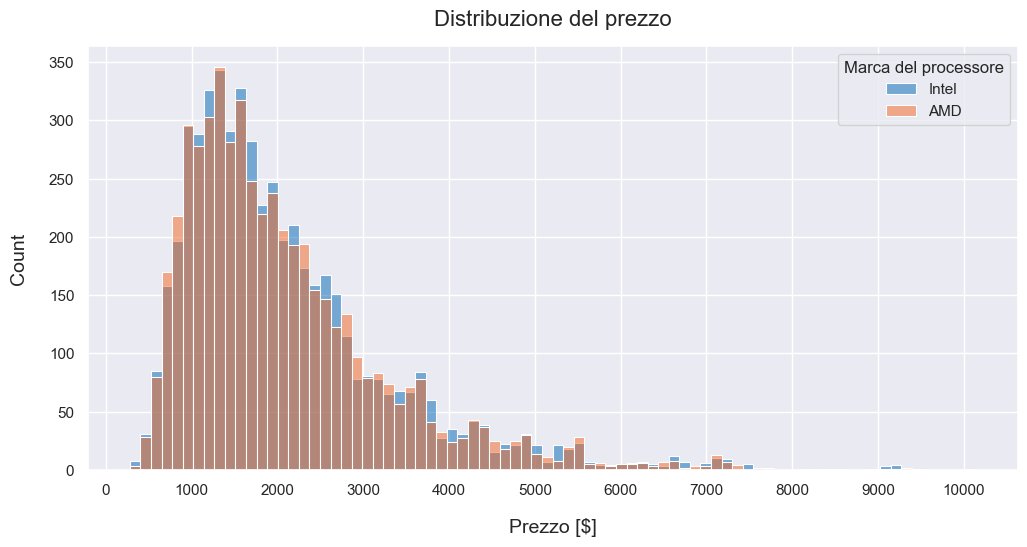

In [17]:

f1, ax1 = plt.subplots(figsize=(12, 5.5))
sns.histplot(data = df_laptop[['ProcessorBrand', 'Price']], x = 'Price', hue = 'ProcessorBrand', stat = 'count', palette = processor_palette, ax = ax1)
plt.xticks(np.arange(0,10001, 1000))

apply_labelpad(ax = ax1, xlabel='Prezzo [$]', ylabel='Count', xpad=15, ypad=15, xloc="center", yloc="center")

plt.legend(title = 'Marca del processore', labels = ['Intel', 'AMD']);

apply_title(ax1, 'Distribuzione del prezzo');

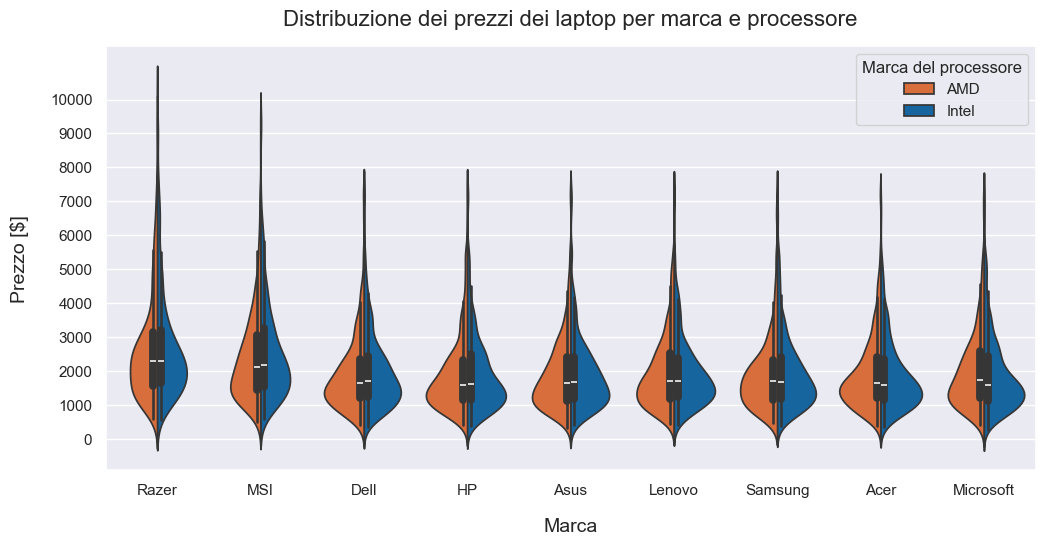

In [10]:

df_processor_brand = df_laptop[['Brand', 'ProcessorBrand', 'Price']]
df_processor_brand = df_processor_brand.sort_values(by = 'Price', ascending = False)

f2, ax2 = plt.subplots(figsize=(12, 5.5))
sns.violinplot(data = df_processor_brand, x = 'Brand', y = 'Price', hue = 'ProcessorBrand', palette = processor_palette, split=True, ax = ax2 )
plt.yticks(np.arange(0,10001, 1000))
apply_labelpad(ax = ax2, xlabel='Marca', ylabel='Prezzo [$]', xpad=15, ypad=15, xloc="center", yloc="center")
plt.legend(title = 'Marca del processore');

apply_title(ax2, 'Distribuzione dei prezzi dei laptop per marca e processore');

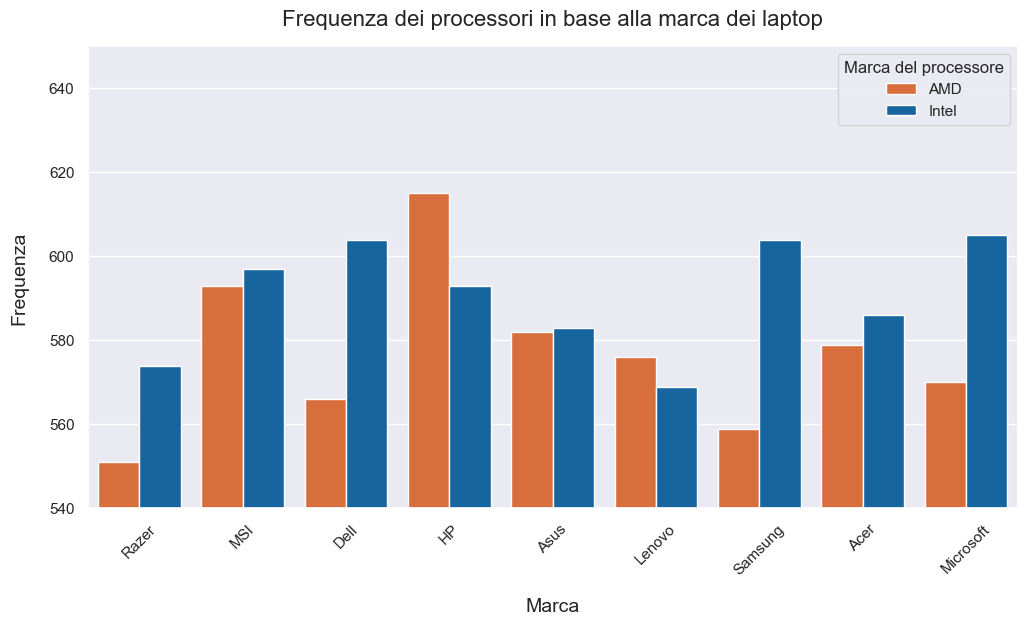

In [78]:

f7, ax7 = plt.subplots(figsize=(12, 6))
sns.countplot(data = df_processor_brand, x = 'Brand', hue = 'ProcessorBrand', palette = processor_palette, ax = ax7)
ax7.set_ylim([540,650])

tick_positions = np.arange(len(df_processor_brand['Brand'].unique()))
apply_labelpad(ax = ax7, xlabel='Marca', ylabel='Frequenza', xpad=15, ypad=15, xloc="center", yloc="center")
ax7.set_xticks(tick_positions)
ax7.set_xticklabels(df_processor_brand['Brand'].unique(), rotation=45)

plt.legend(title = 'Marca del processore');

apply_title(ax7, 'Frequenza dei processori in base alla marca dei laptop');

In [14]:
df_price_weight = df_laptop[['Brand', 'Weight', 'Price', 'ProcessorBrand']]
df_price_weight_desc = df_price_weight.groupby(['Brand', 'ProcessorBrand'])['Weight'].describe().reset_index()
df_price_weight_desc = df_price_weight_desc.sort_values(by = 'mean', ascending = False )

<h1>Qual è il peso medio dei laptop in base alla marca?</h1>

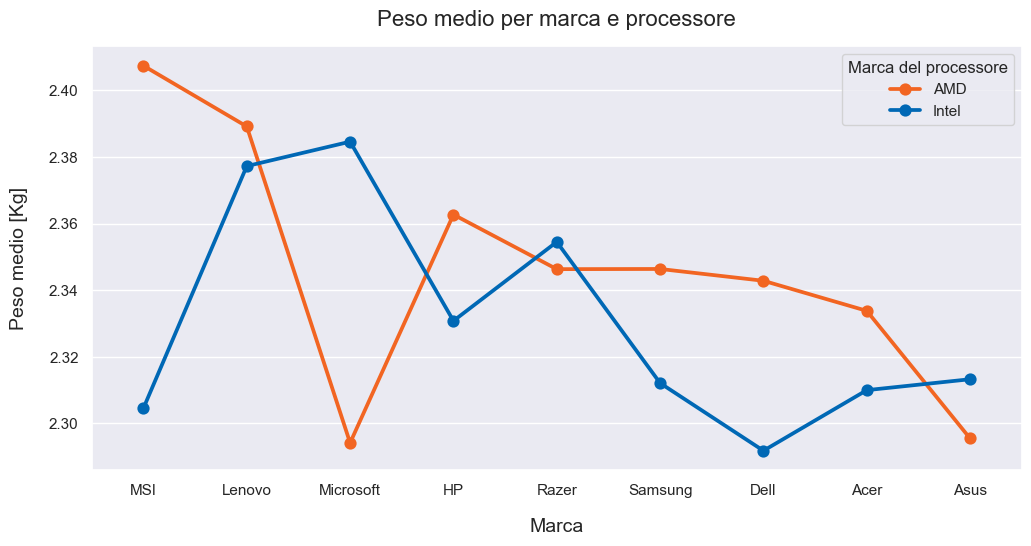

In [80]:
f8, ax8 = plt.subplots(figsize=(12, 5.5))
sns.pointplot(data = df_price_weight_desc, x = 'Brand', y = 'mean', hue = 'ProcessorBrand', palette = processor_palette)

apply_labelpad(ax = ax8, xlabel='Marca', ylabel='Peso medio [Kg]', xpad=15, ypad=15, xloc="center", yloc="center")

plt.legend(title = 'Marca del processore');
apply_title(ax8, 'Peso medio per marca e processore');

<h1>C'è una relazione tra il prezzo e il peso del laptop ?</h1>

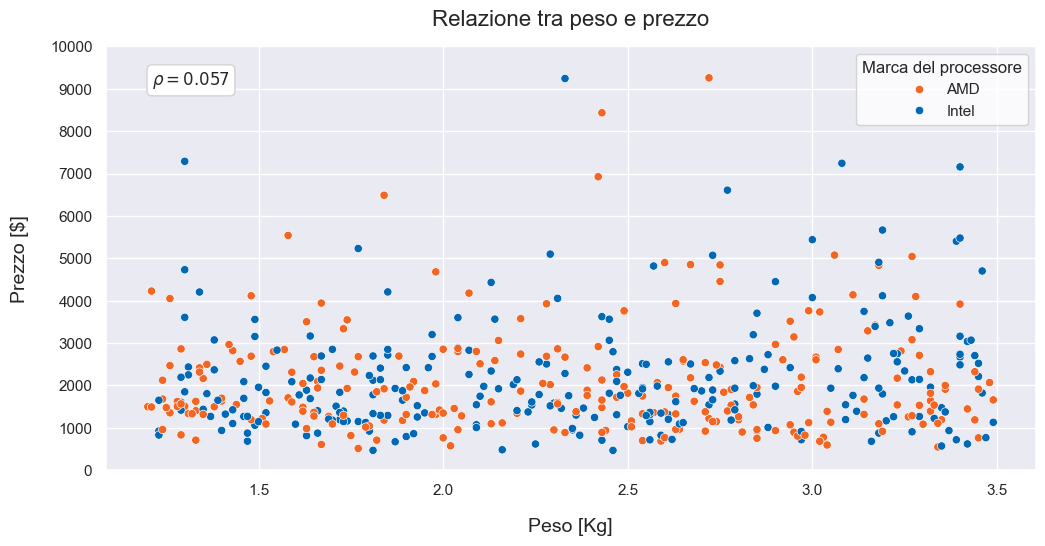

In [26]:

df_price_weight_sample = df_price_weight.sample(n=500)

f9, ax9 = plt.subplots(figsize=(12, 5.5))
sns.scatterplot(data = df_price_weight_sample, x = 'Weight', y = 'Price', hue = 'ProcessorBrand', palette = processor_palette)

ax9.set_ylim([200,10000])
plt.yticks(np.arange(0,10001, 1000))
apply_labelpad(ax = ax9, xlabel='Peso [Kg]', ylabel='Prezzo [$]', xpad=15, ypad=15, xloc="center", yloc="center")
plt.legend(title = 'Marca del processore', facecolor = 'white')

from scipy.stats import spearmanr
rho = spearmanr(df_price_weight_sample['Weight'], df_price_weight_sample['Price']).correlation

ax9.annotate(f'$\\rho = {rho:.3f}$', xy=(0.05, 0.92), 
                    xycoords='axes fraction', ha='left', va='center', 
                    bbox={'boxstyle': 'round', 'fc': 'white', 'ec': 'lightgrey'});

apply_title(ax9, 'Relazione tra peso e prezzo');

<h1>Il prezzo varia regolarmente in base alla risoluzione schermo?</h1>

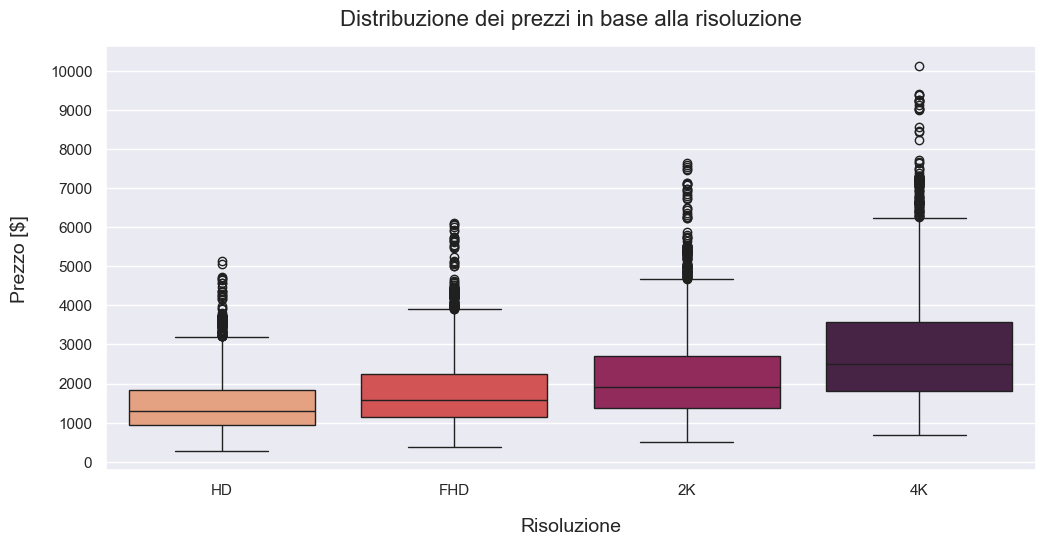

In [12]:
df_resolution_price = df_laptop[['Resolution', 'Price', 'GPUreleaseYear']]
df_resolution_price = df_resolution_price.sort_values(by = 'Price')

f10, ax10 = plt.subplots(figsize=(12, 5.5))
sns.boxplot(data = df_resolution_price, x = 'Resolution', y = 'Price', hue = 'Resolution', legend = False, palette = resolution_palette[::-1])

apply_labelpad(ax = ax10, xlabel='Risoluzione', ylabel='Prezzo [$]', xpad=15, ypad=15, xloc="center", yloc="center")

plt.yticks(np.arange(0,10001, 1000))
plt.xticks(ticks = df_resolution_price['Resolution'].unique(), labels = ['HD', 'FHD', '2K', '4K']);

apply_title(ax10, 'Distribuzione dei prezzi in base alla risoluzione');

In [83]:
df_resolution_price_desc = df_resolution_price.groupby(['Resolution', 'GPUreleaseYear'])['Price'].describe()


<h1>Negli anni il divario di prezzo tra gli schermi 4K e FHD è diminuito?</h1>

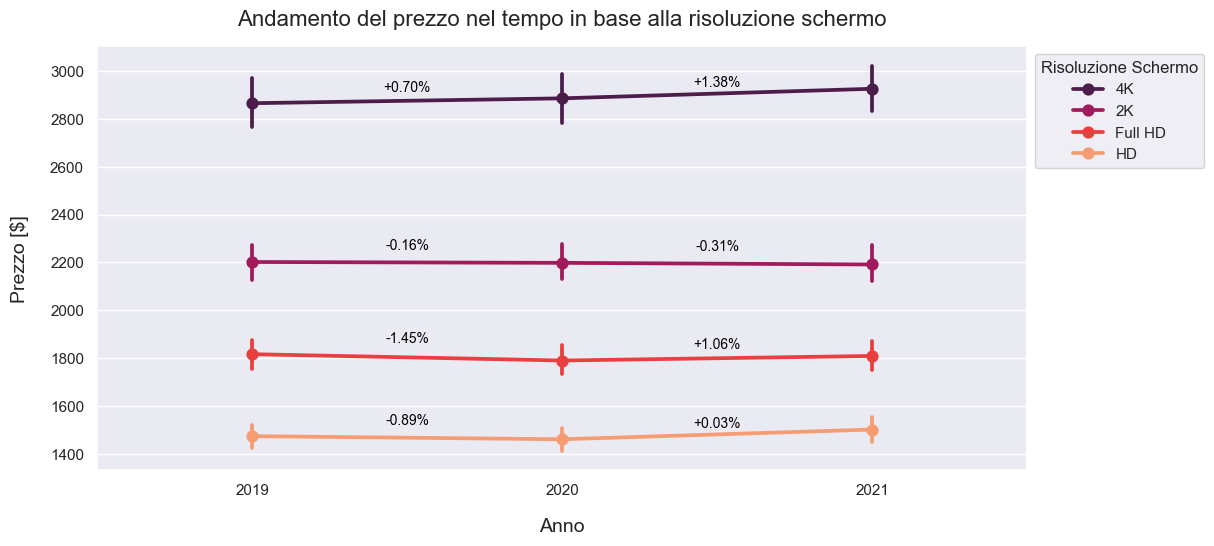

In [84]:
f11, ax11 = plt.subplots(figsize=(12, 5.5))
sns.pointplot(data = df_resolution_price, x = 'GPUreleaseYear', y = 'Price', hue = 'Resolution', hue_order = ["3840x2160", "2560x1440", "1920x1080", "1366x768"], palette = resolution_palette)

# Valori percentuali dell'incremento
incrementi_percentuali = {
    "3840x2160": {2019: "+0.70%", 2020: "+1.38%"},
    "2560x1440": {2019: "-0.16%", 2020: "-0.31%"},
    "1920x1080": {2019: "-1.45%", 2020: "+1.06%"},
    "1366x768": {2019: "-0.89%", 2020: "+0.03%"}
}

for res, anni in incrementi_percentuali.items():
    for i, (anno, incremento) in enumerate(anni.items()):
        x_pos = i + 0.5  # Posizionamento tra due anni consecutivi
        y_pos = df_resolution_price[(df_resolution_price["GPUreleaseYear"] == anno) & 
                                    (df_resolution_price["Resolution"] == res)]["Price"].mean()

        # Annotazione con valore percentuale
        ax11.annotate(incremento, xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 50),
                      ha='center', fontsize=10, color='black')

handles, labels = ax11.get_legend_handles_labels()
ax11.legend(handles, [resolution_name[label] if label in resolution_name else label for label in labels], title="Risoluzione Schermo", bbox_to_anchor=(1, 1))

apply_labelpad(ax = ax11, xlabel='Anno', ylabel='Prezzo [$]', xpad=15, ypad=15, xloc="center", yloc="center")

apply_title(ax11, 'Andamento del prezzo nel tempo in base alla risoluzione schermo');

<h2>Conclusioni</h2>
<ul>
    <li><p><span style="color:#0068b5; font-weight: bold;">Intel</span> ha una presenza maggiore rispetto a <span style="color: #f26522;font-weight: bold;">AMD</span> ma il prezzo dei laptop sostanzialmente non cambia di molto.</p></li>
    <li><p>Le differenze di peso tra i vari brand potrebbero incidere sulla scelta di acquisto da parte del cliente.</p></li>
    <li><p>Non ci sono stati grossi cambiamenti tra i prezzi degli schermi <strong>4K</strong> e <strong>FHD</strong>. Tutti i tipi di schermo hanno una determinata fascia di prezzo che non cambia dal 2019 al 2021.</p></li>
</ul>